Ch3 p39

Repeat exercise 38, but now force the end slopes to be zero.

Note: I am interpreting the problem statement to mean use end condition 2 and force the slopes to zero by setting A and B to zero. I don't know how else one would force the slopes of the other end conditions to zero. Possibly by selecting more points near the end of the interval where the slope of the original function is zero but the problem statement doesn't say to add more points, it only states to adjust the slopes. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from naf.incf import csisv

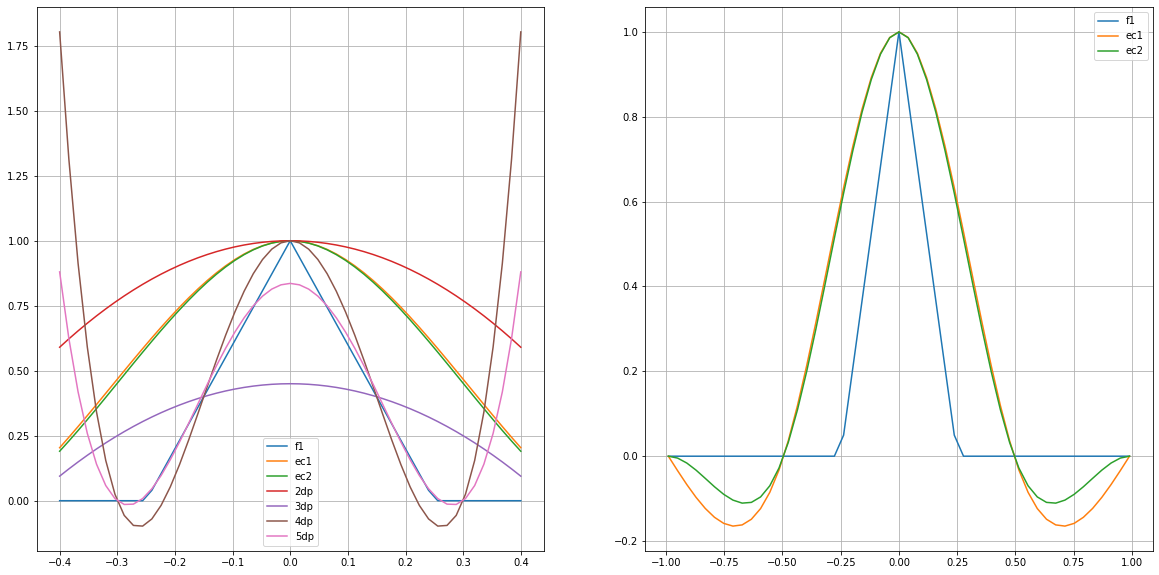

In [3]:
def f1(x):
    if x > -1 and x < -0.25:
        return 0
    if x > -0.25 and x < 0.25:
        return 1 - abs(4*x)
    if x > 0.25 and x < 1:
        return 0

#generating 5 points to match from original equation
x = np.linspace(-0.99, 0.99, 5)
f1y = [f1(i) for i in x]


#range of values for plotting subsequent curves
ivx = np.linspace(-0.40, 0.40, 51)
ivx2 = np.linspace(-0.99, 0.99, 51)

#computing original equation values
f1y2 = [f1(i) for i in ivx]
f1y3 = [f1(i) for i in ivx2]

#computing cubic spline interpolated values
pts = np.column_stack((x,f1y))
ec1_1 = csisv(ivx, pts, 1)
ec1_2 = csisv(ivx2, pts, 1)
ec2_1 = csisv(ivx, pts, 2, 0, 0)
ec2_2 = csisv(ivx2, pts, 2, 0, 0)

#computing 2nd deg polynomial values, equation taken from p33
eq2 = lambda z: 1.0 - 2.56*z**2
veq2 = np.vectorize(eq2)
y2 = veq2(ivx)

#computing 3rd deg polynomial values, equation taken from p33
eq3 = lambda z: -2.22222222222222*z**2 + 2.22044604925031e-16*z + 0.45
veq3 = np.vectorize(eq3)
y3 = veq3(ivx)

#computing 4th deg polynomial values, equation taken from p33
eq4 = lambda z: 230.452674897119*z**4 - 31.8518518518519*z**2 - 4.44089209850063e-16*z + 1.0
veq4 = np.vectorize(eq4)
y4 = veq4(ivx)

#computing 5th deg polynomial values, equation taken from p33
eq5 = lambda z: 136.638374485597*z**4 - 21.5856481481482*z**2 - 4.44089209850063e-16*z + 0.8359375
veq5 = np.vectorize(eq5)
y5 = veq5(ivx)


fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].grid()
ax[0].plot(ivx, f1y2, label="f1")
ax[0].plot(ivx, ec1_1, label="ec1")
ax[0].plot(ivx, ec2_1, label="ec2")
ax[0].plot(ivx, y2, label="2dp")
ax[0].plot(ivx, y3, label="3dp")
ax[0].plot(ivx, y4, label="4dp")
ax[0].plot(ivx, y5, label="5dp")
ax[0].legend()

ax[1].grid()
ax[1].plot(ivx2, f1y3, label="f1")
ax[1].plot(ivx2, ec1_2, label="ec1")
ax[1].plot(ivx2, ec2_2, label="ec2")
ax[1].legend()
plt.show()

Using end condition 2 and forcing the slopes at the ends to zero gives an even better approximation of this function than end condition 1. This makes sense because because force the slope to zero takes more curvature out of the end of the cubic spline. 